### Importing Required Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Reading Data

In [2]:
df = pd.read_csv(r"C:\Users\Kushal Arya\Desktop\Data Analysis With Python\ML Files\bigdatamart_Test.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


### Check no of row and column

In [3]:
print('No of Rows and Columns ----->', df.shape )

No of Rows and Columns -----> (5681, 11)


### Checking for Null values

In [4]:
print('----------------------\n')
print(df.isnull().sum())
print('\n----------------------')

----------------------

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

----------------------


#### There is Item weight and Outlet size has Nan value

### Removing Nan Value

In [5]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

#### We remove all nan on those features

### Checking for Null values remove or not

In [6]:
print('----------------------\n')
print(df.isnull().sum())
print('\n----------------------')

----------------------

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

----------------------


In [7]:
print('No of Rows and Columns Left After Removing NaN ----->', df.shape )

No of Rows and Columns Left After Removing NaN -----> (5681, 11)


### Information about dataset

In [8]:
print('----------------------------------------------------\n')
print(df.info())
print('\n----------------------------------------------------')

----------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB
None

-----------------------------------------

#### Some features are in float and some are in object

### Droping Unwanted Column

In [9]:
col = ['Item_Identifier','Outlet_Identifier']

In [10]:
df = df.drop(columns = col, axis = 1)
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,reg,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,12.695633,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3


In [11]:
print('No of Rows and Columns ----->', df.shape )

No of Rows and Columns -----> (5681, 9)


### Analysis of data

In [12]:
df['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [13]:
df['Item_Type'].value_counts()

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

In [14]:
df['Outlet_Size'].value_counts()

Medium    3468
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [15]:
df['Outlet_Location_Type'].value_counts()

Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64

In [16]:
df['Outlet_Type'].value_counts()

Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64

In [17]:
df['Outlet_Establishment_Year'].value_counts()

1985    976
1987    621
2004    620
1997    620
1999    620
2002    619
2009    618
2007    617
1998    370
Name: Outlet_Establishment_Year, dtype: int64

In [18]:
df['No_of_years_outlet_open'] = [2021] - df['Outlet_Establishment_Year']
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,No_of_years_outlet_open
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1,22
1,8.300000,reg,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1,14
2,14.600000,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store,23
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1,14
4,12.695633,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3,36


#### Convert Outlet establishment year into No of years outlets open because it esaier to incode

In [19]:
print('----------------------------------------------------\n')
print(df.info())
print('\n----------------------------------------------------')

----------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5681 non-null   float64
 1   Item_Fat_Content           5681 non-null   object 
 2   Item_Visibility            5681 non-null   float64
 3   Item_Type                  5681 non-null   object 
 4   Item_MRP                   5681 non-null   float64
 5   Outlet_Establishment_Year  5681 non-null   int64  
 6   Outlet_Size                5681 non-null   object 
 7   Outlet_Location_Type       5681 non-null   object 
 8   Outlet_Type                5681 non-null   object 
 9   No_of_years_outlet_open    5681 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 444.0+ KB
None

----------------------------------------------------


In [20]:
df = df.drop('Outlet_Establishment_Year', axis = 1)
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,No_of_years_outlet_open
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,Medium,Tier 1,Supermarket Type1,22
1,8.300000,reg,0.038428,Dairy,87.3198,Medium,Tier 2,Supermarket Type1,14
2,14.600000,Low Fat,0.099575,Others,241.7538,Medium,Tier 3,Grocery Store,23
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,Medium,Tier 2,Supermarket Type1,14
4,12.695633,Regular,0.118599,Dairy,234.2300,Medium,Tier 3,Supermarket Type3,36


#### Drop Outlet establishment year

### Filter Categorical features

In [21]:
numerics = ['int64', 'float64']
categorical_col = []
features = df.columns.values.tolist()
for col in features:
    if df[col].dtype in numerics:
        continue
    categorical_col.append(col)

### Encoding categorical columns using get dummies

In [22]:
df_dummies = pd.get_dummies(df[categorical_col], drop_first = True)
df_dummies.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1


In [24]:
df_dummies.shape

(5681, 26)

In [26]:
df = df.join(df_dummies)

In [27]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,No_of_years_outlet_open,Item_Fat_Content_Low Fat,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,Medium,Tier 1,Supermarket Type1,22,1,...,1,0,0,1,0,0,0,1,0,0
1,8.300000,reg,0.038428,Dairy,87.3198,Medium,Tier 2,Supermarket Type1,14,0,...,0,0,0,1,0,1,0,1,0,0
2,14.600000,Low Fat,0.099575,Others,241.7538,Medium,Tier 3,Grocery Store,23,1,...,0,0,0,1,0,0,1,0,0,0
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,Medium,Tier 2,Supermarket Type1,14,1,...,1,0,0,1,0,1,0,1,0,0
4,12.695633,Regular,0.118599,Dairy,234.2300,Medium,Tier 3,Supermarket Type3,36,0,...,0,0,0,1,0,0,1,0,0,1


In [28]:
df.drop(columns = categorical_col, axis = 1, inplace = True)

In [29]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,No_of_years_outlet_open,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750000,0.007565,107.8622,22,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,8.300000,0.038428,87.3198,14,0,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
2,14.600000,0.099575,241.7538,23,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,7.315000,0.015388,155.0340,14,1,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
4,12.695633,0.118599,234.2300,36,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


### Checking Outliers

---------------------
Distribution Plot :- 
---------------------


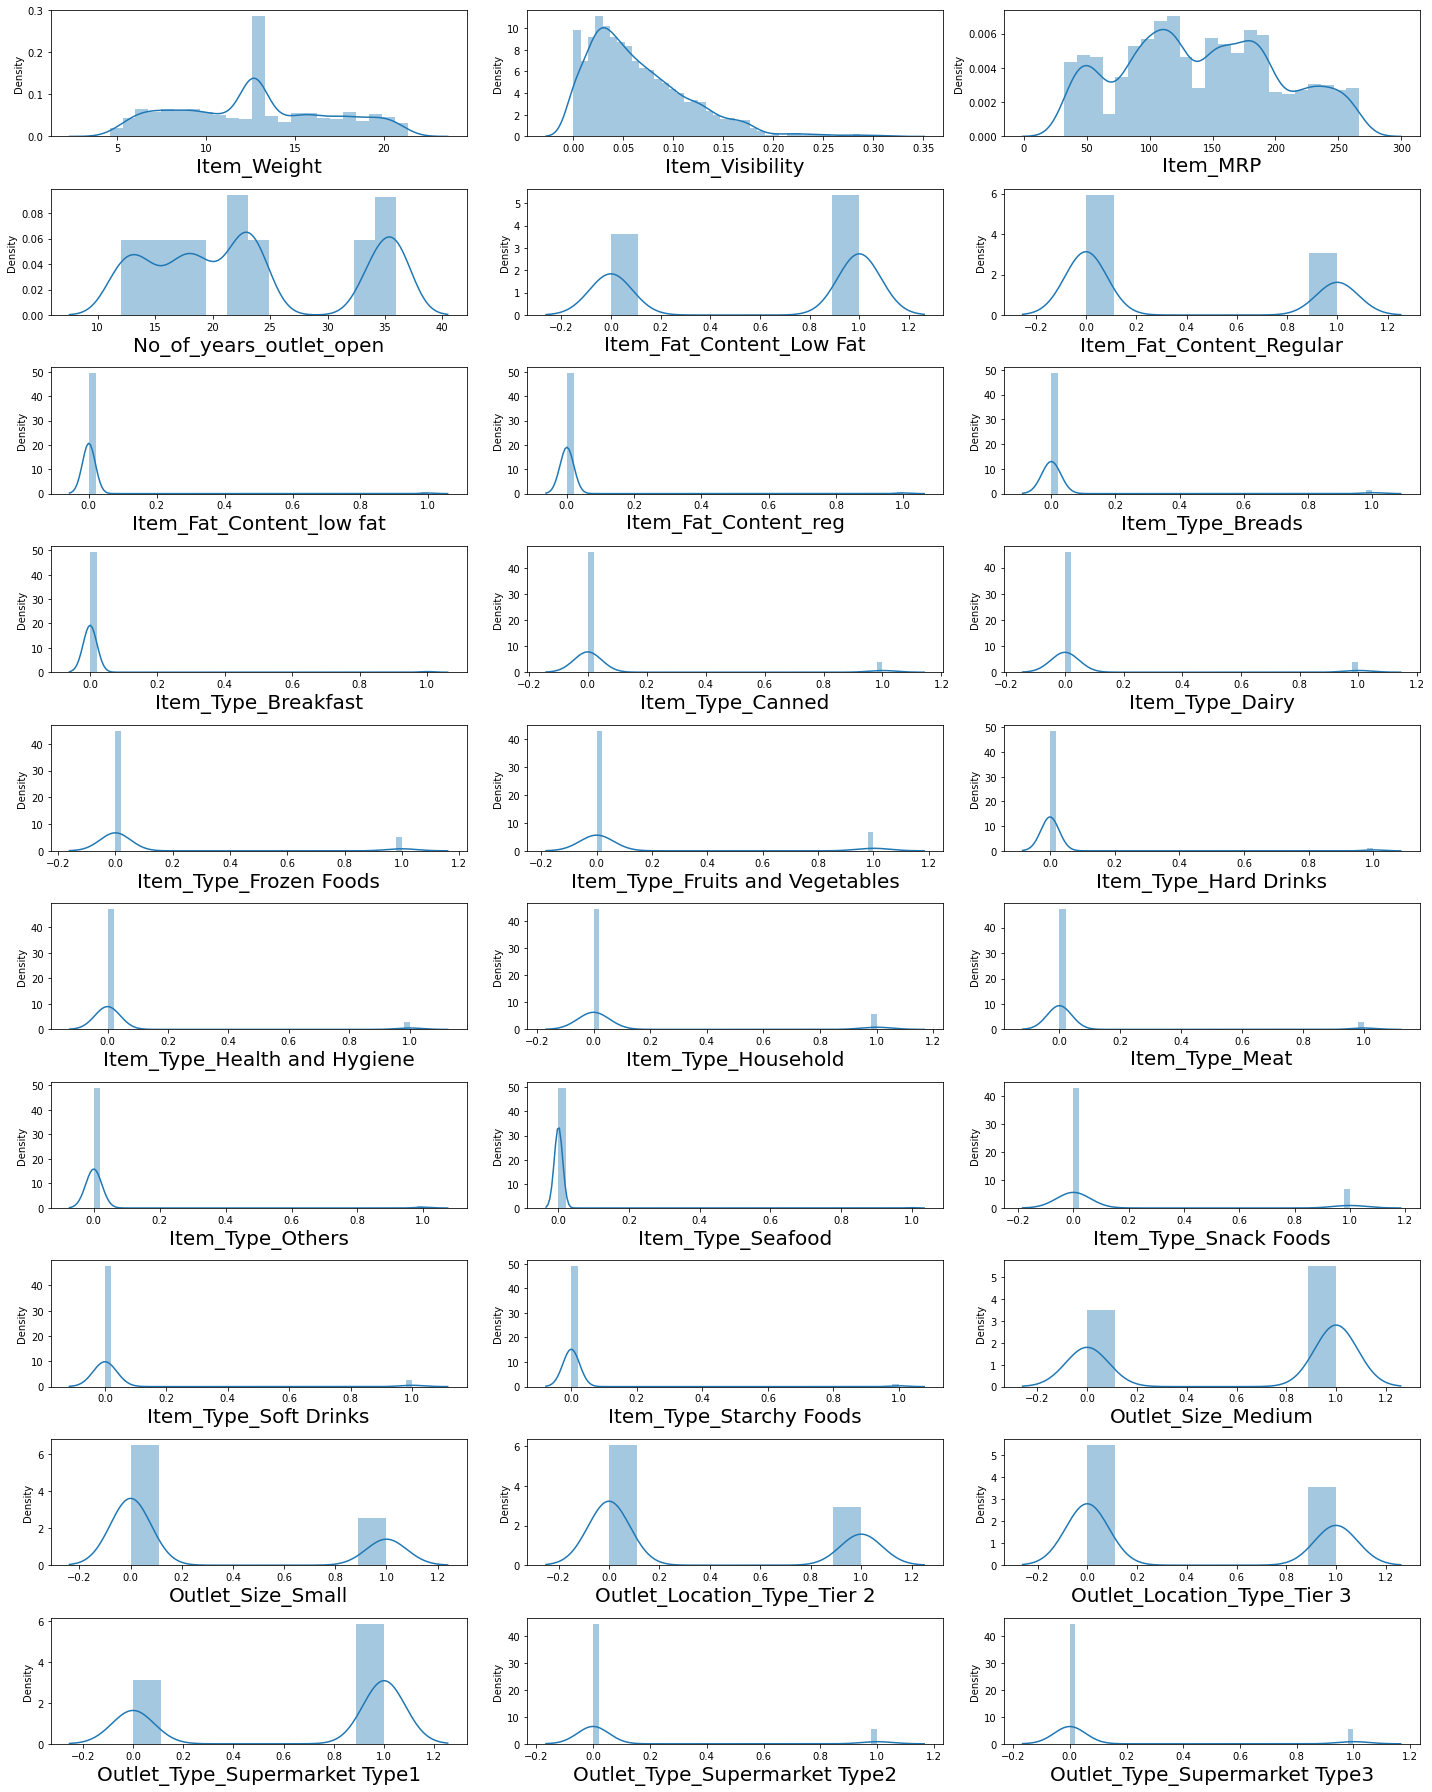

In [30]:
print('---------------------')
print('Distribution Plot :- ')
print('---------------------')
      
plt.figure(figsize = (20,25))
plotnumber = 1

for column in df:
    if plotnumber <=30:
        ax = plt.subplot(10,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

#### Some outliers present in columns

### Power Transformer to remove outliers

In [32]:
scaler = PowerTransformer(method = 'yeo-johnson')
x_scaled = scaler.fit_transform(df)
x_scaled

array([[ 1.77007392, -1.46206861, -0.47201654, ...,  0.72689965,
        -0.34937375, -0.35127385],
       [-1.03619283, -0.44801894, -0.83599752, ...,  0.72689965,
        -0.34937375, -0.35127385],
       [ 0.49167513,  0.87134242,  1.52537499, ..., -1.37570571,
        -0.34937375, -0.35127385],
       ...,
       [-0.59355557,  0.39786781, -0.288074  , ...,  0.72689965,
        -0.34937375, -0.35127385],
       [ 0.64562931, -1.76023409,  1.15680222, ...,  0.72689965,
        -0.34937375, -0.35127385],
       [-0.72091914,  0.9524881 , -0.97581463, ...,  0.72689965,
        -0.34937375, -0.35127385]])

### Checking Outlier remove or not

---------------------
Distribution Plot :- 
---------------------


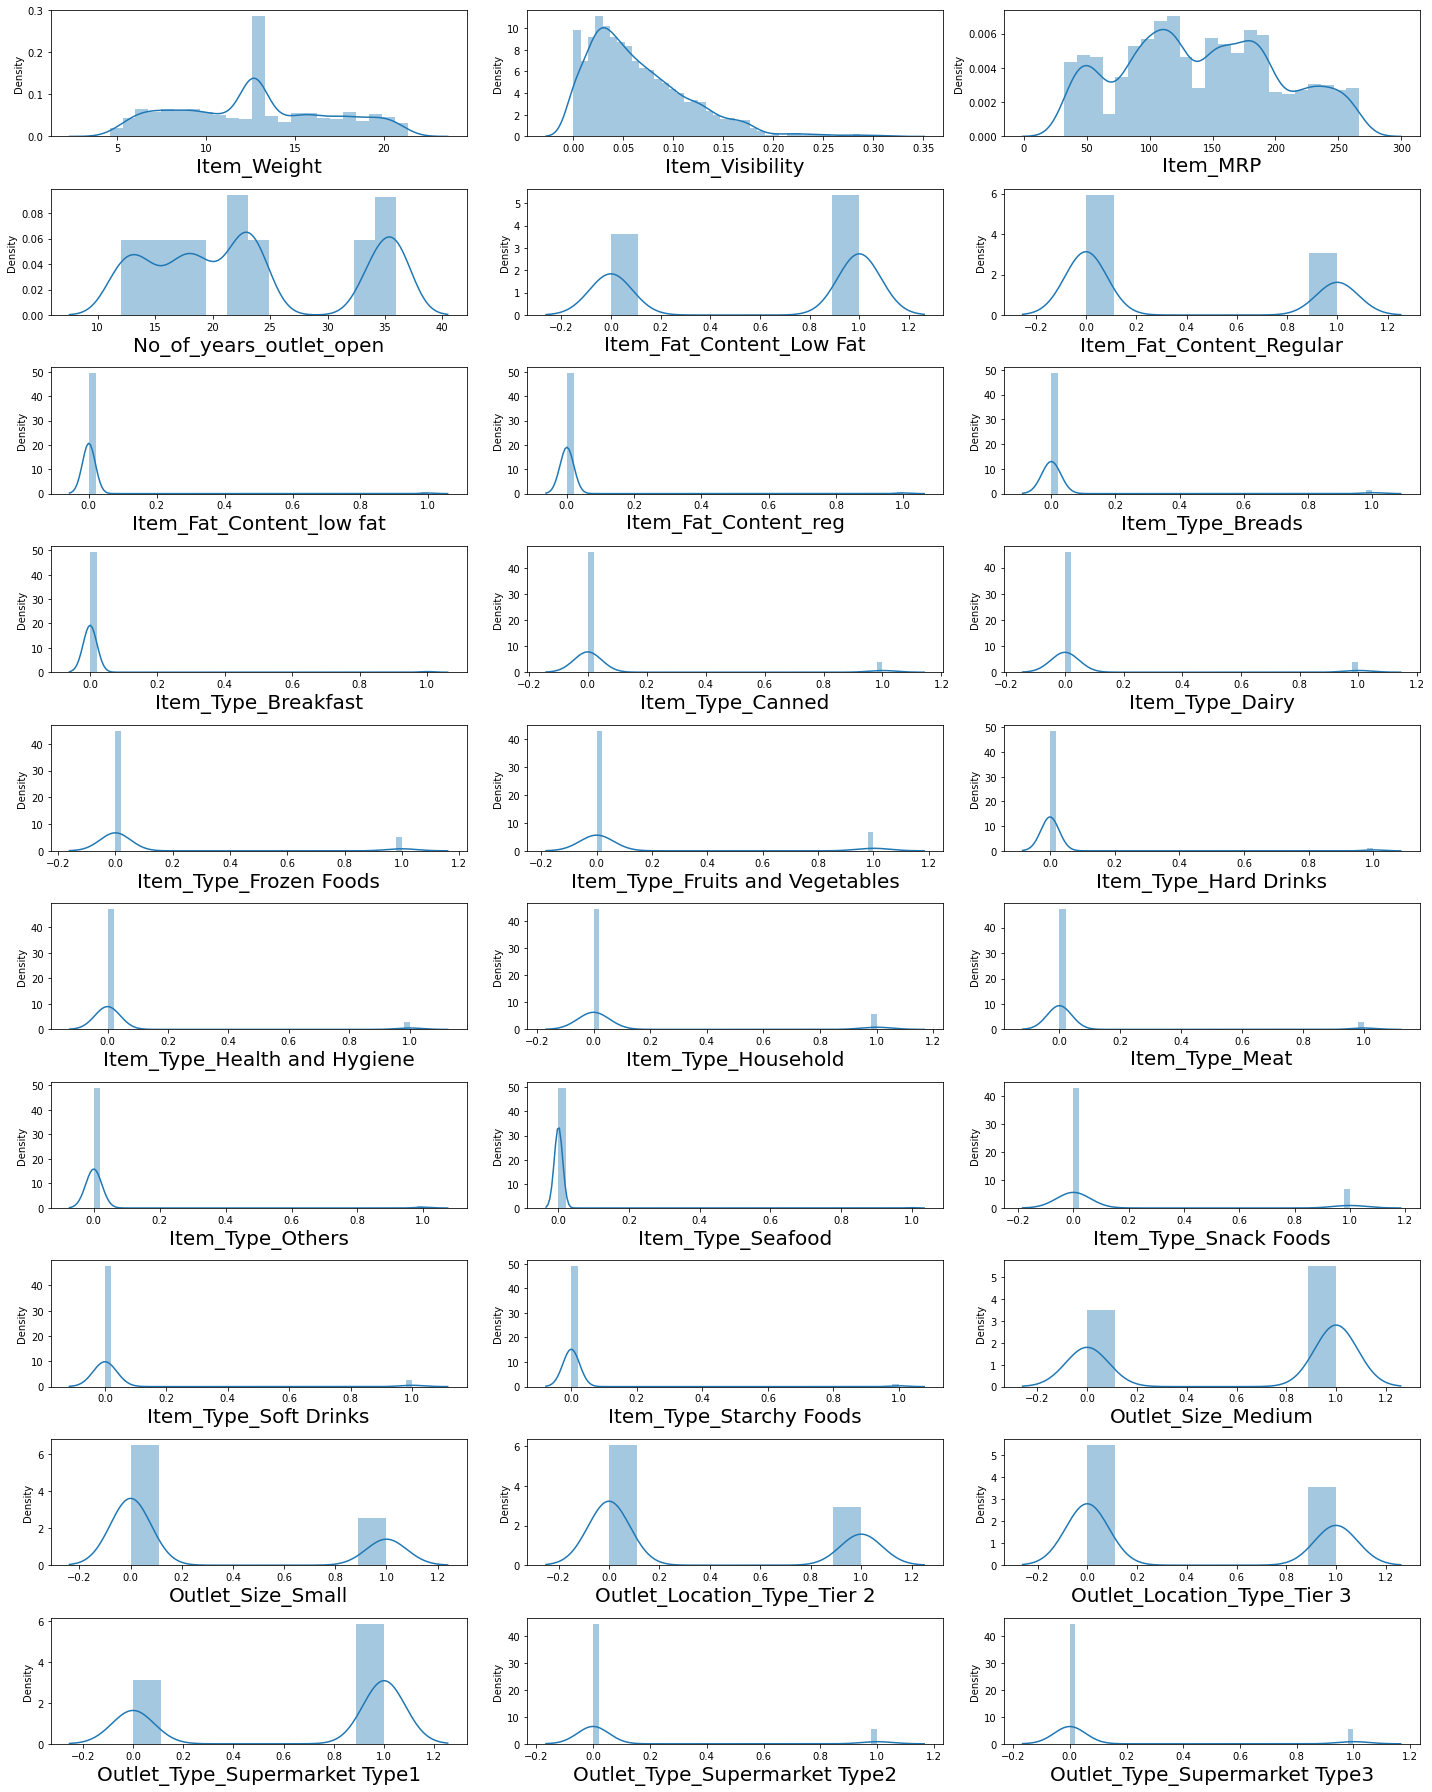

In [33]:
print('---------------------')
print('Distribution Plot :- ')
print('---------------------')
      
plt.figure(figsize = (20,25))
plotnumber = 1

for column in df:
    if plotnumber <=30:
        ax = plt.subplot(10,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

#### Outliers are removed

### Load Pickle File

In [40]:
model = pickle.load(open('Big Data Mart Sales Train.pickle', 'rb'))

In [44]:
a = model.predict(df)
a

array([1793.58824495, 1413.1182747 , 1928.6508598 , ..., 1881.885621  ,
       3653.25026613, 1359.89941381])

In [45]:
pred = pd.DataFrame(a)

In [46]:
pred.to_csv('Test Predict.csv', index = False)